In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'novi_datasetovi\train_test_v1.csv', parse_dates=['date'])
df=df.drop(columns=['Unnamed: 0'])
train=df[df['date']<'2017-08-16']
test=df[df['date']>= '2017-08-16']
train_wide=pd.pivot(train, index=['date'], columns=['store_nbr','family'], values=['sales'])
train_wide.head()

sales                                                \
store_nbr          1                                                  
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2013-01-01        0.0       0.0    0.0       0.0   0.0        0.000   
2013-01-02        2.0       0.0    2.0    1091.0   0.0      470.652   
2013-01-03        3.0       0.0    0.0     919.0   0.0      310.655   
2013-01-04        3.0       0.0    3.0     953.0   0.0      198.366   
2013-01-05        5.0       0.0    3.0    1160.0   0.0      301.057   

                                                 ...                    \
store_nbr                                        ...        54           
family     CELEBRATION CLEANING  DAIRY     DELI  ... MAGAZINES   MEATS   
date                                             ...                     
2013-01-01         0.0      0.0    0.0    0.000  ...       0.0   0.000   
2013-01-02         0.0   1060.0  579.0  164.069  ...       0.0  73.771   
2013-01-03         0.0    836.0  453.0  151.582  ...       0.0  50.257   
2013-01-04         0.0    827.0  460.0  131.411  ...       0.0  40.223   
2013-01-05         0.0    811.0  464.0  118.613  ...       0.0  43.431   

                                                                       \
store_nbr                                                               
family     PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS POULTRY   
date                                                                    
2013-01-01           0.0          0.0                     0.0   0.000   
2013-01-02         228.0          0.0                     0.0  15.514   
2013-01-03         156.0          0.0                     0.0   4.313   
2013-01-04         146.0          0.0                     0.0  26.743   
2013-01-05         205.0          0.0                     0.0  31.118   

                                                                      
store_nbr                                                             
family     PREPARED FOODS PRODUCE SCHOOL AND OFFICE SUPPLIES SEAFOOD  
date                                                                  
2013-01-01            0.0     0.0                        0.0     0.0  
2013-01-02           61.0     0.0                        0.0     3.0  
2013-01-03            1.0     0.0                        0.0     2.0  
2013-01-04           38.0     0.0                        0.0     2.0  
2013-01-05           32.0     0.0                        0.0     1.0  

[5 rows x 1782 columns]

In [3]:
#there are store-family pairs with all tareget zeros
all_zeros =train_wide.loc[:, (train_wide == 0).all()]
all_zeros

sales                                                \
store_nbr         1     9     10    11    12        13          14   
family     BABY CARE BOOKS BOOKS BOOKS BOOKS BABY CARE BOOKS BOOKS   
date                                                                 
2013-01-01       0.0   0.0   0.0   0.0   0.0       0.0   0.0   0.0   
2013-01-02       0.0   0.0   0.0   0.0   0.0       0.0   0.0   0.0   
2013-01-03       0.0   0.0   0.0   0.0   0.0       0.0   0.0   0.0   
2013-01-04       0.0   0.0   0.0   0.0   0.0       0.0   0.0   0.0   
2013-01-05       0.0   0.0   0.0   0.0   0.0       0.0   0.0   0.0   
...              ...   ...   ...   ...   ...       ...   ...   ...   
2017-08-11       0.0   0.0   0.0   0.0   0.0       0.0   0.0   0.0   
2017-08-12       0.0   0.0   0.0   0.0   0.0       0.0   0.0   0.0   
2017-08-13       0.0   0.0   0.0   0.0   0.0       0.0   0.0   0.0   
2017-08-14       0.0   0.0   0.0   0.0   0.0       0.0   0.0   0.0   
2017-08-15       0.0   0.0   0.0   0.0   0.0       0.0   0.0   0.0   

                                  ...                                          \
store_nbr                     15  ...        47        48        49        50   
family     LAWN AND GARDEN BOOKS  ... BABY CARE BABY CARE BABY CARE BABY CARE   
date                              ...                                           
2013-01-01             0.0   0.0  ...       0.0       0.0       0.0       0.0   
2013-01-02             0.0   0.0  ...       0.0       0.0       0.0       0.0   
2013-01-03             0.0   0.0  ...       0.0       0.0       0.0       0.0   
2013-01-04             0.0   0.0  ...       0.0       0.0       0.0       0.0   
2013-01-05             0.0   0.0  ...       0.0       0.0       0.0       0.0   
...                    ...   ...  ...       ...       ...       ...       ...   
2017-08-11             0.0   0.0  ...       0.0       0.0       0.0       0.0   
2017-08-12             0.0   0.0  ...       0.0       0.0       0.0       0.0   
2017-08-13             0.0   0.0  ...       0.0       0.0       0.0       0.0   
2017-08-14             0.0   0.0  ...       0.0       0.0       0.0       0.0   
2017-08-15             0.0   0.0  ...       0.0       0.0       0.0       0.0   

                                                                       
store_nbr         51        52          54                             
family     BABY CARE BABY CARE BOOKS BOOKS LADIESWEAR LAWN AND GARDEN  
date                                                                   
2013-01-01       0.0       0.0   0.0   0.0        0.0             0.0  
2013-01-02       0.0       0.0   0.0   0.0        0.0             0.0  
2013-01-03       0.0       0.0   0.0   0.0        0.0             0.0  
2013-01-04       0.0       0.0   0.0   0.0        0.0             0.0  
2013-01-05       0.0       0.0   0.0   0.0        0.0             0.0  
...              ...       ...   ...   ...        ...             ...  
2017-08-11       0.0       0.0   0.0   0.0        0.0             0.0  
2017-08-12       0.0       0.0   0.0   0.0        0.0             0.0  
2017-08-13       0.0       0.0   0.0   0.0        0.0             0.0  
2017-08-14       0.0       0.0   0.0   0.0        0.0             0.0  
2017-08-15       0.0       0.0   0.0   0.0        0.0             0.0  

[1688 rows x 53 columns]

In [99]:
#making dataframe with store- familiy pairs that have all zeros in train
all_zero_pairs=all_zeros.columns.to_frame().reset_index(drop=True).drop(columns=0)
all_zeros.to_csv('novi_datasetovi/all_zero_pairs.csv')

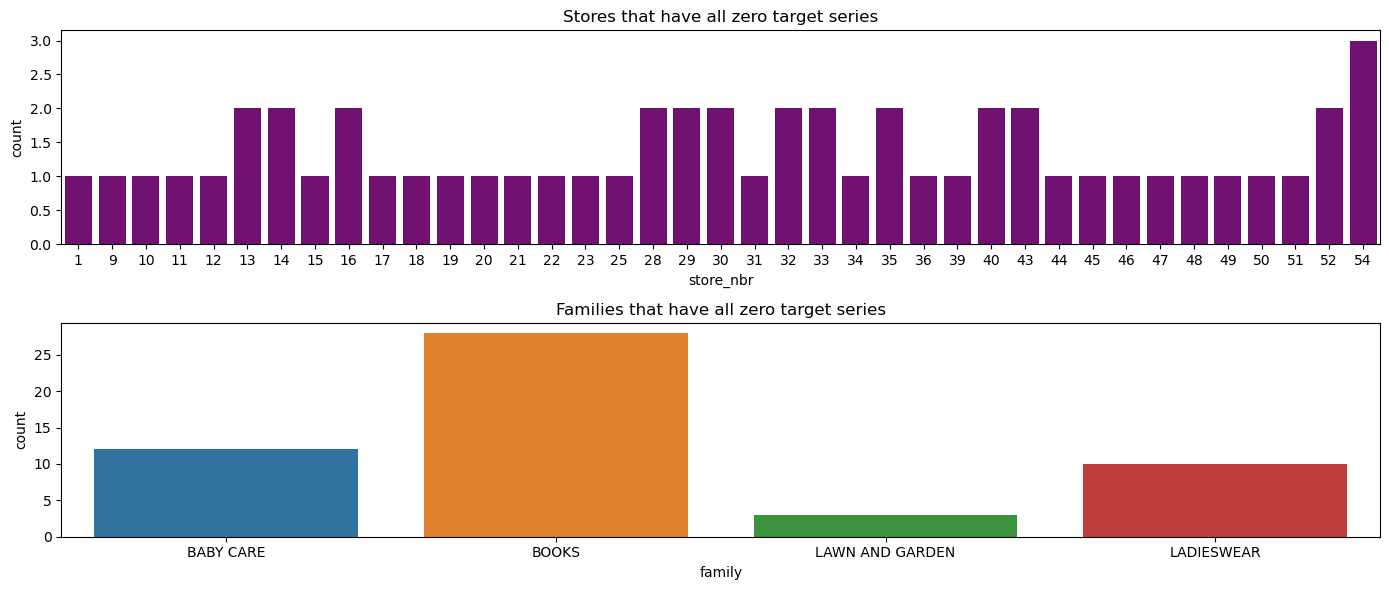

In [18]:
#is this more connected with different stores or different family products?

fig = plt.figure(figsize=(14, 6))

ax0=sns.countplot( data=all_zero_pairs, x='store_nbr',color='purple', ax=fig.add_subplot(211))
plt.title("Stores that have all zero target series")

ax0=sns.countplot( data=all_zero_pairs, x='family', ax=fig.add_subplot(212))
plt.title("Families that have all zero target series")

plt.tight_layout()
plt.show()

#conclusion: uniformly throughout stores, probably some families of products are not being (successfully) sold in some stores

In [86]:
#problem: leading zeros

def num_leading_zeros(series):
    nz_idx=np.where(series!=0)[0] #bc it return tuple
    if len(nz_idx)==0:
        #all zeros
        return len(series)
    else:
        return nz_idx[0]

In [87]:
#for all pairs store-family number of leading zeros
leading_zeros=train_wide.apply(num_leading_zeros).to_frame('num_leading_zeros').reset_index()
#removing all zeros series
leading_zeros=leading_zeros[leading_zeros['num_leading_zeros']!=train_wide.shape[0]]

In [88]:
leading_zeros

,level_0,store_nbr,family,num_leading_zeros
0,sales,1,AUTOMOTIVE,1
2,sales,1,BEAUTY,1
3,sales,1,BEVERAGES,1
4,sales,1,BOOKS,1381
5,sales,1,BREAD/BAKERY,1
6,sales,1,CELEBRATION,366
7,sales,1,CLEANING,1
8,sales,1,DAIRY,1
9,sales,1,DELI,1
10,sales,1,EGGS,1


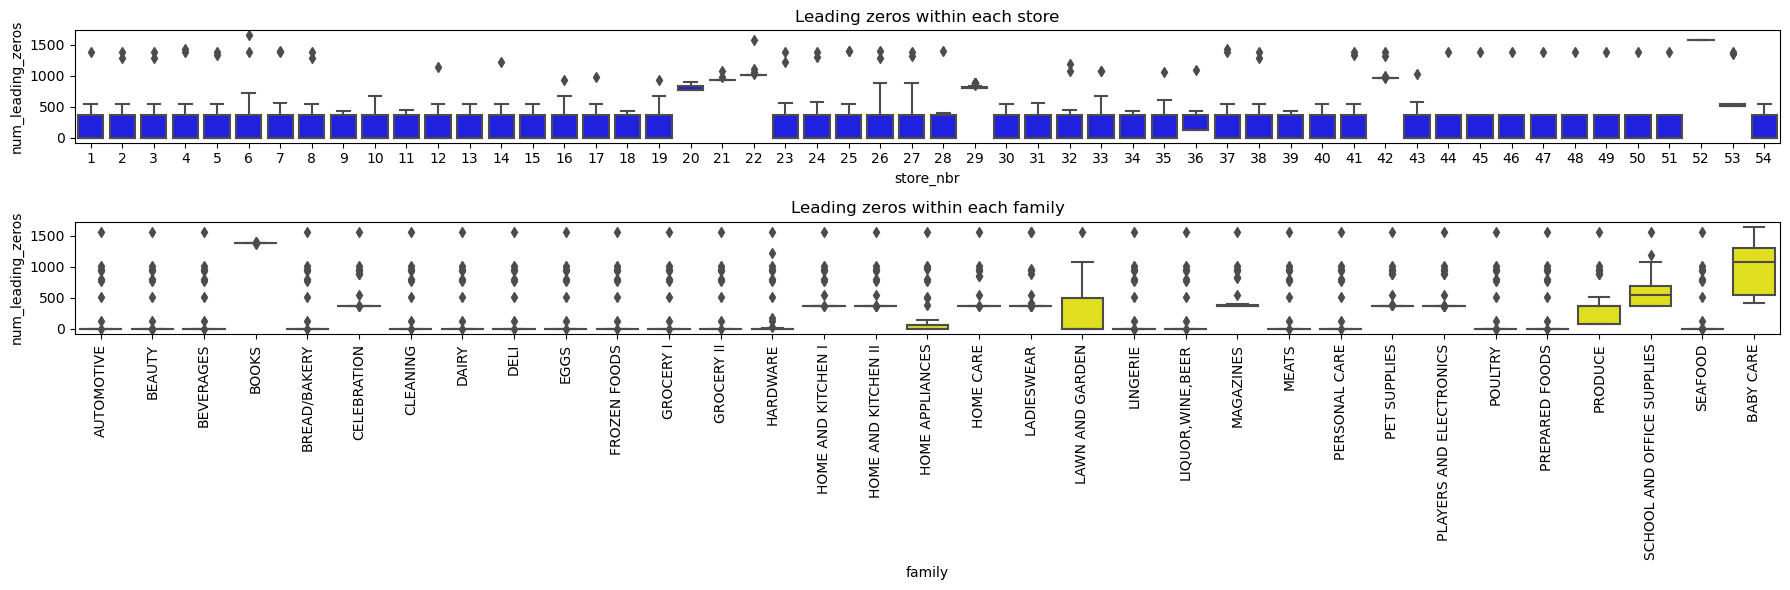

In [89]:
#is this more store or family related?

#by store
fig=plt.figure(figsize=(18,6))
ax0=sns.boxplot(data=leading_zeros, x='store_nbr', y='num_leading_zeros', color='blue', ax=fig.add_subplot(211))
plt.title('Leading zeros within each store')

#by family
ax1=sns.boxplot(data=leading_zeros, x='family', y='num_leading_zeros', color='yellow', ax=fig.add_subplot(212))
plt.title('Leading zeros within each family')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#conclusion: same as all zeros conclusion (mostly)

In [93]:
#problem: trailing zeros

def num_trailing_zeros(series):
    nz_idx=np.where(series!=0)[0] #bc it return tuple
    if len(nz_idx)==0:
        #all zeros
        return len(series)
    else:
        return len(series)-nz_idx[-1]-1

In [95]:
#for all pairs store-family number of trailing zeros
trailing_zeros=train_wide.apply(num_trailing_zeros).to_frame('num_trailing_zeros').reset_index()
#removing all zeros series
trailing_zeros=trailing_zeros[trailing_zeros['num_trailing_zeros']!=train_wide.shape[0]]

In [96]:
trailing_zeros.num_trailing_zeros.gt(0).sum()

208

In [97]:
trailing_zeros

,level_0,store_nbr,family,num_trailing_zeros
0,sales,1,AUTOMOTIVE,0
2,sales,1,BEAUTY,0
3,sales,1,BEVERAGES,0
4,sales,1,BOOKS,15
5,sales,1,BREAD/BAKERY,0
6,sales,1,CELEBRATION,0
7,sales,1,CLEANING,0
8,sales,1,DAIRY,0
9,sales,1,DELI,0
10,sales,1,EGGS,0


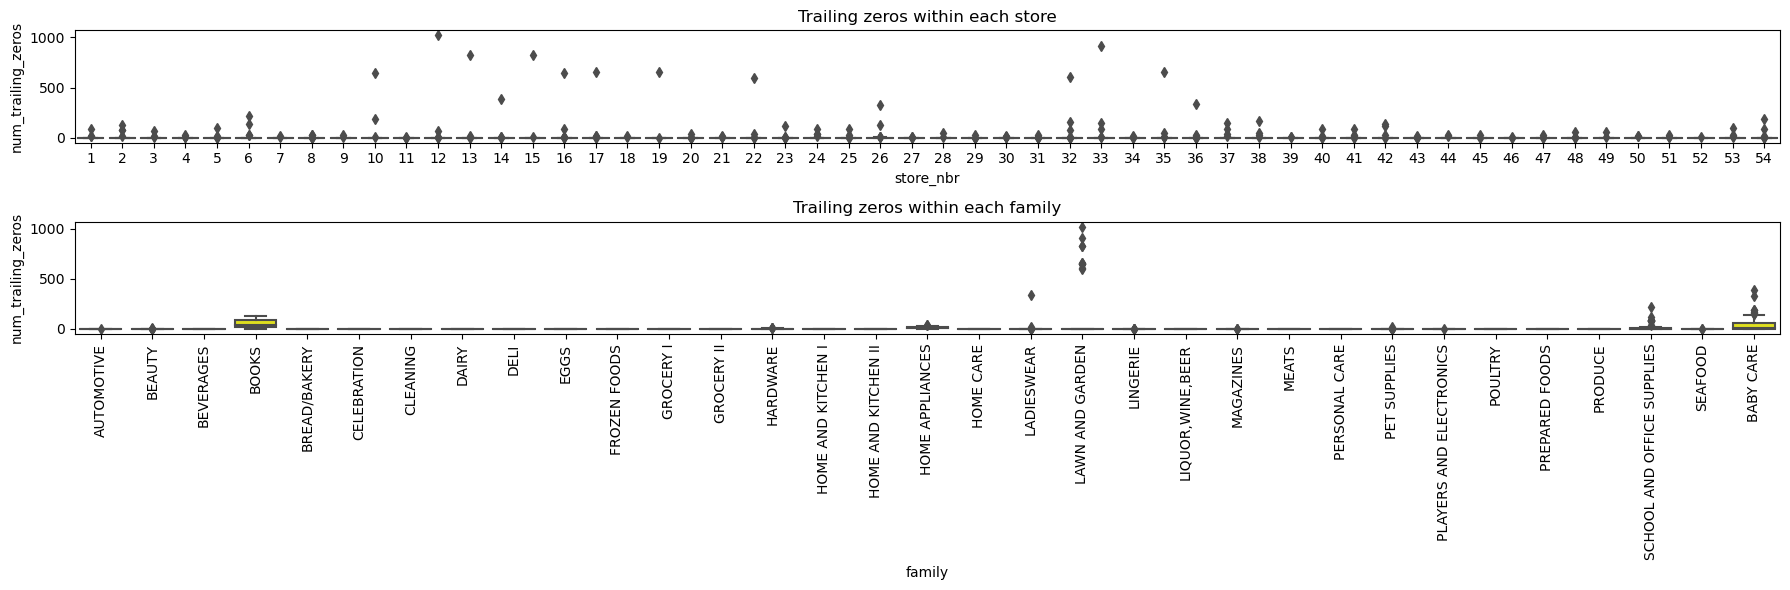

In [98]:
#is this more store or family related?

#by store
fig=plt.figure(figsize=(18,6))
ax0=sns.boxplot(data=trailing_zeros, x='store_nbr', y='num_trailing_zeros', color='blue', ax=fig.add_subplot(211))
plt.title('Trailing zeros within each store')

#by family
ax1=sns.boxplot(data=trailing_zeros, x='family', y='num_trailing_zeros', color='yellow', ax=fig.add_subplot(212))
plt.title('Trailing zeros within each family')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#conclusion: "poor sales performance or that the product is no longer available towards the end. An example would be lawn and garden. In this case, generating zero forecasts for such target series would be a reasonable approach."